In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transforms = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', transform=transforms, train=True, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', transform=transforms, train=False)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data


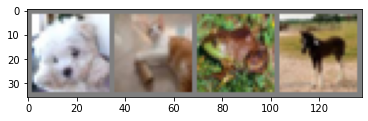

  dog   cat  frog horse


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5) # 3 is RGB channels, 6 is new more complex channels(no. of filters), 5 is kernel size (5x5 ka filter)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5) 
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
epochs = 2

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(epochs):
    running_loss = 0
    for (i,data) in enumerate(trainloader, 0):
        images, labels = data

        optimizer.zero_grad()

        output = net(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.243
[1,  4000] loss: 1.896
[1,  6000] loss: 1.705
[1,  8000] loss: 1.597
[1, 10000] loss: 1.529
[1, 12000] loss: 1.494
[2,  2000] loss: 1.446
[2,  4000] loss: 1.394
[2,  6000] loss: 1.375
[2,  8000] loss: 1.354
[2, 10000] loss: 1.307
[2, 12000] loss: 1.316
Finished Training


In [0]:
# Save current state
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# Load model state
# net = Net()
# net.load_state_dict(torch.load(PATH))

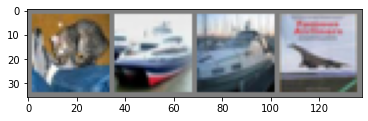

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car  ship plane


In [0]:
# Select a set of images and check what the model thinks
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

output = net(images)

_, predicted = torch.max(output, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [0]:
# Over the entire data set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [0]:
# Which classes performed better
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 69 %
Accuracy of  bird : 47 %
Accuracy of   cat : 44 %
Accuracy of  deer : 37 %
Accuracy of   dog : 43 %
Accuracy of  frog : 59 %
Accuracy of horse : 64 %
Accuracy of  ship : 71 %
Accuracy of truck : 58 %
